In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from ripser import ripser
from persim import plot_diagrams
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [19]:
df = pd.read_csv('Cancer_Data.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {len(df.columns)}")
print(f"Rows: {len(df)}")
df.head()

Dataset shape: (569, 33)

Columns: 33
Rows: 569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
print("Dataset Information:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum().sum())
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perim

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [21]:
df_clean = df.drop('id', axis=1)
print(f"Dropped 'id' column")
print(f"New shape: {df_clean.shape}")

Dropped 'id' column
New shape: (569, 32)


In [22]:
df_clean['diagnosis'] = df_clean['diagnosis'].map({'M': 1, 'B': 0})
print("Diagnosis encoding: M → 1 (Malignant), B → 0 (Benign)")
print(f"\nValue counts:")
print(df_clean['diagnosis'].value_counts())
print(f"\nMalignant: {(df_clean['diagnosis']==1).sum()} ({(df_clean['diagnosis']==1).sum()/len(df_clean)*100:.1f}%)")
print(f"Benign: {(df_clean['diagnosis']==0).sum()} ({(df_clean['diagnosis']==0).sum()/len(df_clean)*100:.1f}%)")


Diagnosis encoding: M → 1 (Malignant), B → 0 (Benign)

Value counts:
diagnosis
0    357
1    212
Name: count, dtype: int64

Malignant: 212 (37.3%)
Benign: 357 (62.7%)


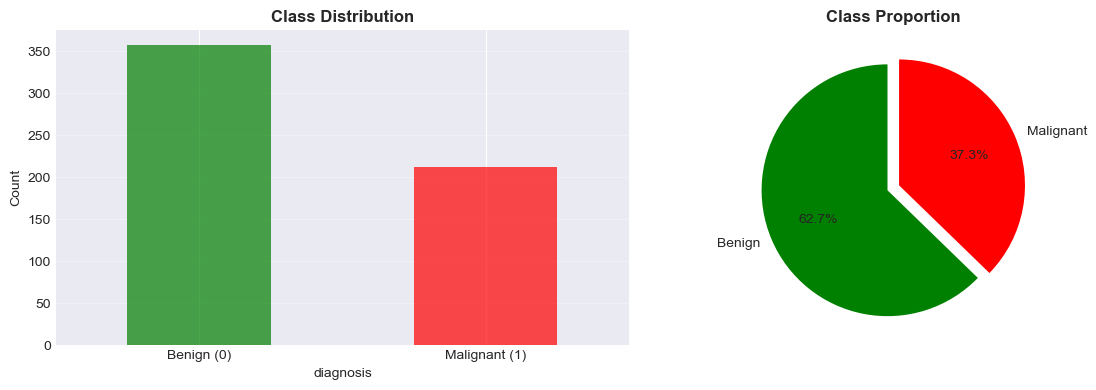

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_clean['diagnosis'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_xticklabels(['Benign (0)', 'Malignant (1)'], rotation=0)
axes[0].set_title('Class Distribution', fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

colors = ['green', 'red']
explode = (0.05, 0.05)
df_clean['diagnosis'].value_counts().plot(kind='pie', ax=axes[1], 
                                         labels=['Benign', 'Malignant'],
                                         colors=colors, explode=explode,
                                         autopct='%1.1f%%', startangle=90)
axes[1].set_title('Class Proportion', fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [24]:
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"\nFeature names ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")

Features shape: (569, 31)
Labels shape: (569,)

Feature names (31):
 1. radius_mean
 2. texture_mean
 3. perimeter_mean
 4. area_mean
 5. smoothness_mean
 6. compactness_mean
 7. concavity_mean
 8. concave points_mean
 9. symmetry_mean
10. fractal_dimension_mean
11. radius_se
12. texture_se
13. perimeter_se
14. area_se
15. smoothness_se
16. compactness_se
17. concavity_se
18. concave points_se
19. symmetry_se
20. fractal_dimension_se
21. radius_worst
22. texture_worst
23. perimeter_worst
24. area_worst
25. smoothness_worst
26. compactness_worst
27. concavity_worst
28. concave points_worst
29. symmetry_worst
30. fractal_dimension_worst
31. Unnamed: 32


In [25]:
# Check and handle any NaN or inf values
print("Checking for missing/invalid values...")
print(f"Missing values in X: {X.isnull().sum().sum()}")

# Fill any NaN with column mean
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.mean())
    print("✓ NaN values filled with column means")

# Replace inf with NaN then fill
X = X.replace([np.inf, -np.inf], np.nan)
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.mean())
    print("✓ Infinite values handled")

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Final check and clean
X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=0.0, neginf=0.0)

print(f"\nFeatures standardized")
print(f"X_scaled shape: {X_scaled.shape}")
print(f"NaN in X_scaled: {np.isnan(X_scaled).sum()}")
print(f"Mean: {X_scaled.mean():.6f}")
print(f"Std: {X_scaled.std():.6f}")

Checking for missing/invalid values...
Missing values in X: 569
✓ NaN values filled with column means
✓ Infinite values handled

Features standardized
X_scaled shape: (569, 31)
NaN in X_scaled: 0
Mean: -0.000000
Std: 0.983739


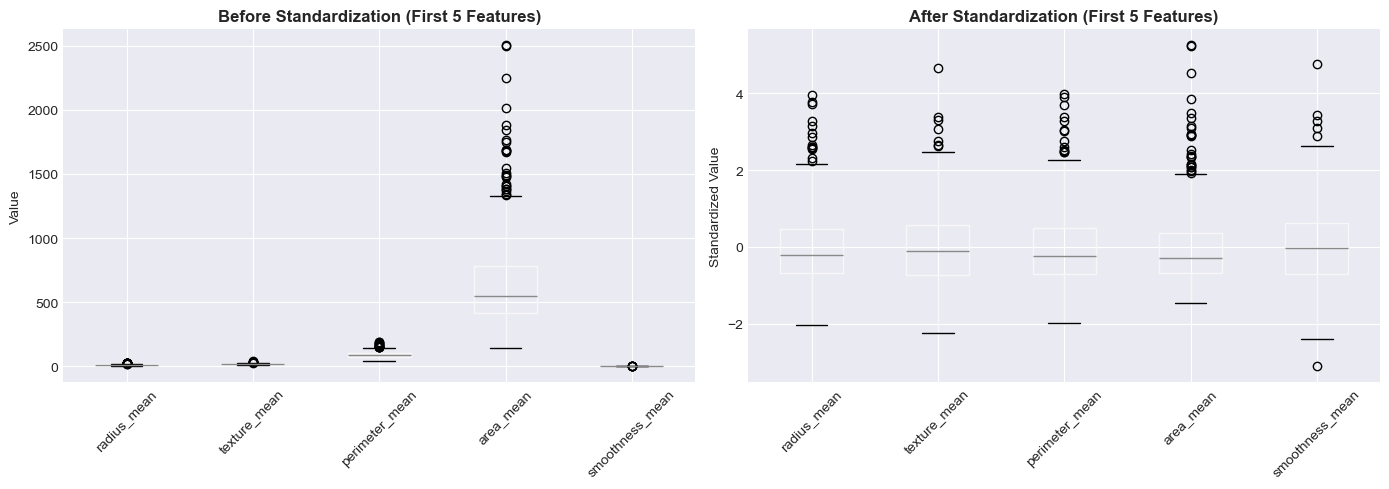

In [26]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

X.iloc[:, :5].boxplot(ax=axes[0])
axes[0].set_title('Before Standardization (First 5 Features)', fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)

X_scaled_df.iloc[:, :5].boxplot(ax=axes[1])
axes[1].set_title('After Standardization (First 5 Features)', fontweight='bold')
axes[1].set_ylabel('Standardized Value')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [27]:
# Convert y to numpy array to avoid indexing issues
y_array = y.values

X_malignant = X_scaled[y_array == 1]
X_benign = X_scaled[y_array == 0]

print(f"Malignant samples: {X_malignant.shape}")
print(f"Benign samples: {X_benign.shape}")
print(f"Total: {X_malignant.shape[0] + X_benign.shape[0]}")
print(f"\nNaN in X_malignant: {np.isnan(X_malignant).sum()}")
print(f"NaN in X_benign: {np.isnan(X_benign).sum()}")

Malignant samples: (212, 31)
Benign samples: (357, 31)
Total: 569

NaN in X_malignant: 0
NaN in X_benign: 0


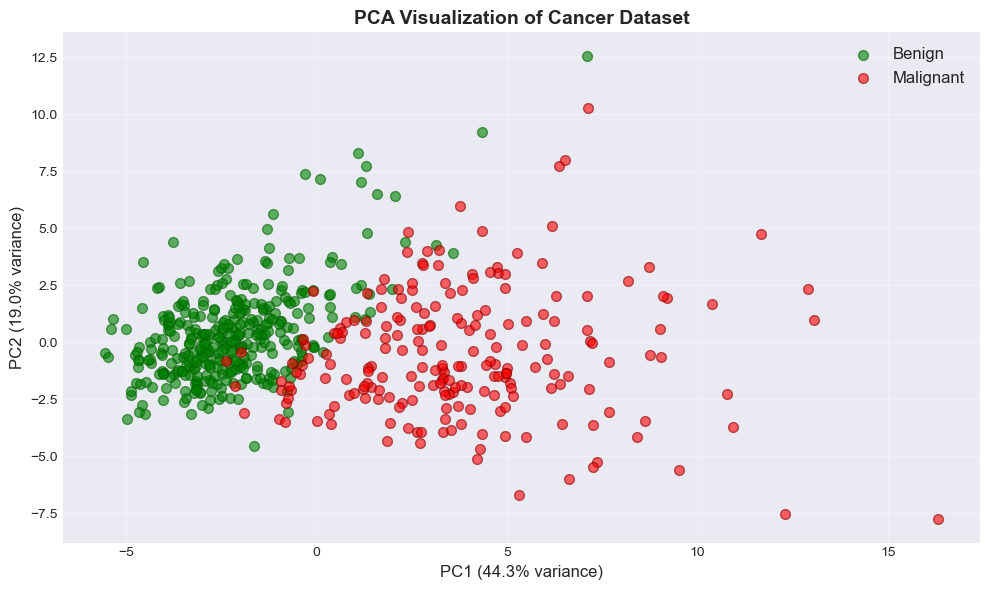

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y_array==0, 0], X_pca[y_array==0, 1], c='green', alpha=0.6, s=50, label='Benign', edgecolors='darkgreen')
plt.scatter(X_pca[y_array==1, 0], X_pca[y_array==1, 1], c='red', alpha=0.6, s=50, label='Malignant', edgecolors='darkred')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('PCA Visualization of Cancer Dataset', fontweight='bold', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
print("Computing persistent homology using Ripser...\n")
print("1. Computing for FULL dataset...")
result_full = ripser(X_scaled, maxdim=2, thresh=10)
dgms_full = result_full['dgms']

print(f"   ✓ H0 (connected components): {len(dgms_full[0])} features")
print(f"   ✓ H1 (loops/holes): {len(dgms_full[1])} features")
if len(dgms_full) > 2:
    print(f"   ✓ H2 (voids): {len(dgms_full[2])} features")

Computing persistent homology using Ripser...

1. Computing for FULL dataset...
   ✓ H0 (connected components): 569 features
   ✓ H1 (loops/holes): 423 features
   ✓ H2 (voids): 190 features


In [30]:
print("Computing for MALIGNANT subset...")
result_malignant = ripser(X_malignant, maxdim=2, thresh=10)
dgms_malignant = result_malignant['dgms']

print(f"   ✓ H0: {len(dgms_malignant[0])} features")
print(f"   ✓ H1: {len(dgms_malignant[1])} features")
if len(dgms_malignant) > 2:
    print(f"   ✓ H2: {len(dgms_malignant[2])} features")

Computing for MALIGNANT subset...
   ✓ H0: 212 features
   ✓ H1: 124 features
   ✓ H2: 35 features


In [31]:
print("Computing for MALIGNANT subset...")
result_malignant = ripser(X_malignant, maxdim=2, thresh=10)
dgms_malignant = result_malignant['dgms']

print(f"   ✓ H0: {len(dgms_malignant[0])} features")
print(f"   ✓ H1: {len(dgms_malignant[1])} features")
if len(dgms_malignant) > 2:
    print(f"   ✓ H2: {len(dgms_malignant[2])} features")

Computing for MALIGNANT subset...
   ✓ H0: 212 features
   ✓ H1: 124 features
   ✓ H2: 35 features


In [32]:
print("Computing for BENIGN subset...")
result_benign = ripser(X_benign, maxdim=2, thresh=10)
dgms_benign = result_benign['dgms']

print(f"   ✓ H0: {len(dgms_benign[0])} features")
print(f"   ✓ H1: {len(dgms_benign[1])} features")
if len(dgms_benign) > 2:
    print(f"   ✓ H2: {len(dgms_benign[2])} features")

print("\n✓ Persistent homology computation complete!")

Computing for BENIGN subset...
   ✓ H0: 357 features
   ✓ H1: 264 features
   ✓ H2: 121 features

✓ Persistent homology computation complete!
